# Trenzado
----------
Segundo experimento  ( Solo uno )

In [1]:
# show data/report.png
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

Text(0.5, 1.0, 'Trenzado')

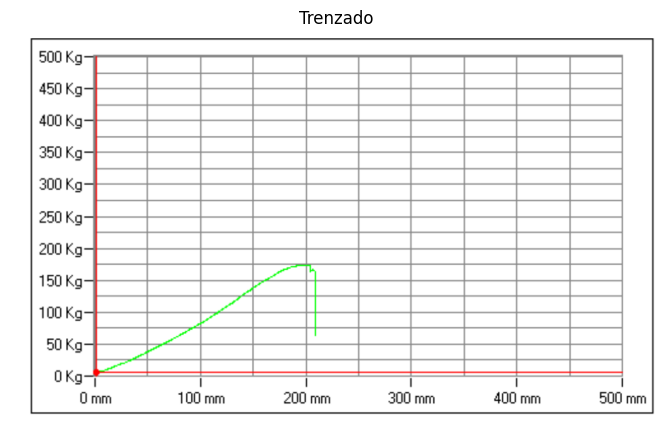

In [2]:
# show data/report.png

plt.figure(figsize=(10, 5))
plt.imshow(np.array(plt.imread('data/report2.png')))
plt.axis('off')
plt.title('Trenzado')

In [3]:
radius      = 4  # mm
radius_hilo = 0.27 # mm
rho_lineal  = 176.6 # m/kg
nhilos      = 4 # 16 hebras de 4 hilos
nint        = 15
rho_ext     = 540 # Deniers = gr/9000m
rho_int     = 540 # Deniers = gr/9000m

In [4]:
resis_trac   = [ 174  ] # Kg
alargamiento = [ 193.7 ] # mm
elong_rel    = [100.155 / 100 ]
longitud = alargamiento[0]/elong_rel[0]

In [5]:
longitud

193.40022964405173

In [6]:
resis_trac_N = np.array(resis_trac) * 9.81
Area         = np.pi * (radius_hilo)**2 * (16*nhilos)
sigma        = resis_trac_N / Area # MPa

In [7]:
df = pd.DataFrame({'Alargamiento (mm)': alargamiento,
                     'Tensión (MPa)': sigma})

In [8]:
df

,Alargamiento (mm),Tensión (MPa)
0,193.7,116.455735


In [9]:
# data/data.csv
df_exp = pd.read_csv('data/report2.csv',header=None)
df_exp = [ df_exp.iloc[:,id:(id+2)]  for id in range(0,df_exp.shape[1],2) ]

# rm nan
for i in range(len(df_exp)):
    df_exp[i] = df_exp[i].dropna()
    df_exp[i].columns = ['alargamiento [mm]','fuerza [kg]']
    df_exp[i]['alargamiento [mm]'] = df_exp[i]['alargamiento [mm]'].astype(float)
    df_exp[i]['fuerza [kg]'] = df_exp[i]['fuerza [kg]'].astype(float)
    #to MPa
    df_exp[i]['stress [MPa]'] = df_exp[i]['fuerza [kg]']*9.81/Area # 
    ################################
    long = longitud # mm !!! Corregido!!!
    ################################
    df_exp[i]['strain [-]'] = df_exp[i]['alargamiento [mm]']/long #
    # add new column exp label

# concat data add new column exp label


In [10]:
df_exp[i]

,alargamiento [mm],fuerza [kg],stress [MPa],strain [-]
0,0.000000,0.000000,0.000000,0.000000
1,2.336815,4.397504,2.943187,0.012083
2,6.668034,7.143014,4.780718,0.034478
3,12.998784,11.536490,7.721209,0.067212
4,19.996045,16.479287,11.029353,0.103392
5,27.991973,21.420986,14.336762,0.144736
6,36.322254,27.462426,18.380213,0.187809
7,43.986758,33.504600,22.424154,0.227439
8,50.649665,37.347655,24.996256,0.261890
9,57.982744,44.490303,29.776729,0.299807


Text(0.5, 1.0, 'Digitalización de la curva de tensión-deformación')

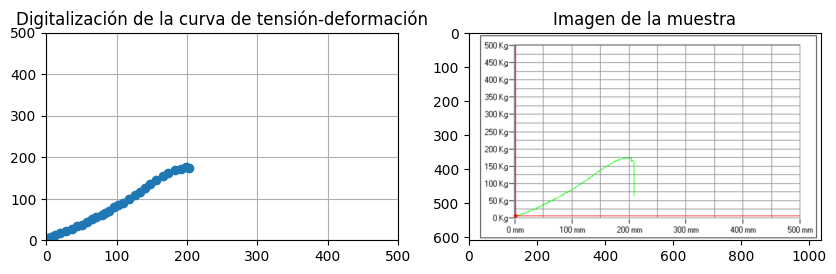

In [11]:
fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,2)
# png plot
plt.imshow(np.array(plt.imread('data/report2.png')))
xlim = plt.xlim()
ylim = plt.ylim()
aspect = (ylim[1]-ylim[0])/(xlim[1]-xlim[0])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Imagen de la muestra")
plt.subplot(1,2,1)
plt.plot(df_exp[0]['alargamiento [mm]'],df_exp[0]["fuerza [kg]"],'o',label='Exp. 1')
plt.grid()
plt.xlim(0,500)
plt.ylim(0,500)
# aspect ratio equal to image
plt.gca().set_aspect(np.abs(aspect), adjustable='box')
plt.title("Digitalización de la curva de tensión-deformación")

Text(0.5, 1.0, 'Trenzado')

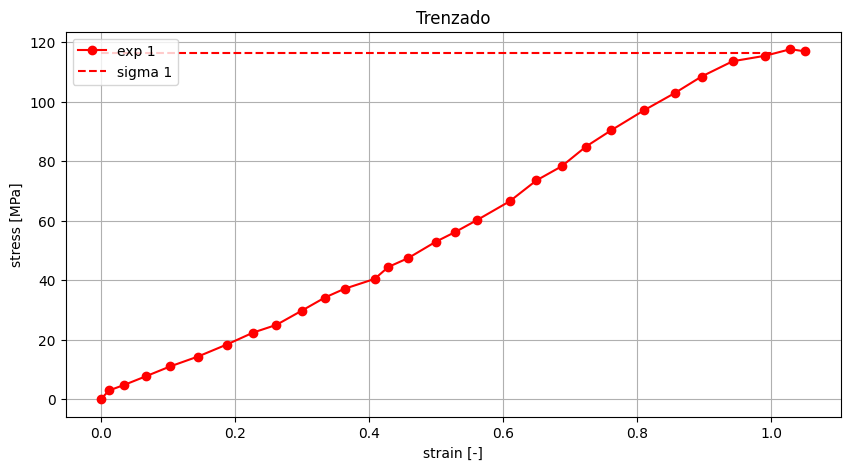

In [12]:
plt.figure(figsize=(10,5))
color = ['r','g','b']
for i in range(len(df_exp)):
    plt.plot(df_exp[i]['strain [-]'],df_exp[i]['stress [MPa]'],'o-',label=f'exp {i+1}',c=color[i])
    # horizontal line
    sigma = df["Tensión (MPa)"][i]
    plt.hlines(sigma,0,1,linestyles='dashed',label=f'sigma {i+1}',colors=color[i])
plt.legend()
plt.grid()
plt.xlabel('strain [-]')
plt.ylabel('stress [MPa]')
title = "Trenzado"
plt.title(title)

In [13]:
for i in range(len(df_exp)):
    # csv
    df_exp[i].to_csv(f'data/exp{i+1}.csv',index=False)

In [14]:
from tools.basic.loadsavejson import loadjson

In [15]:
results = loadjson("../../../../scripts/C01_MultiYarn/validation/data/results.json")

In [16]:
results["df"]

,tensile strength [MPa],strain [-]
0,141.78,0.11422
1,134.50,0.09322
2,140.28,0.13473


In [17]:
curves = [ results["df_exp"]["exp "+str(i+1)] for i in range(3) ]

Text(0, 0.5, 'stress [MPa]')

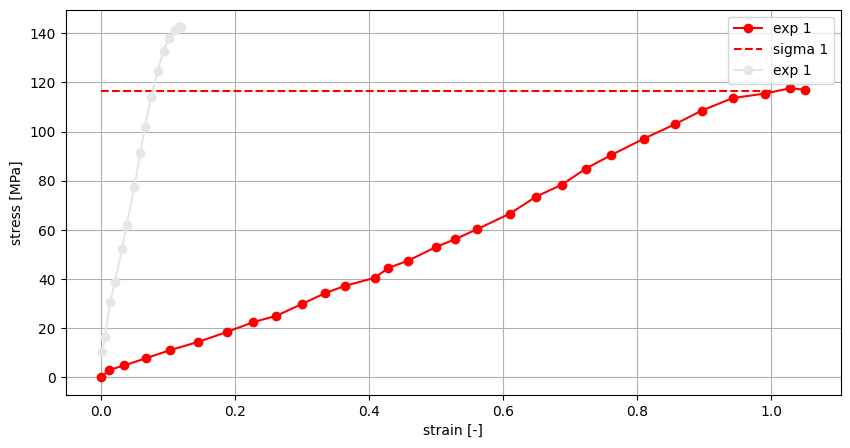

In [18]:
plt.figure(figsize=(10,5))
color = ['r','g','b']
for i in range(len(df_exp)):
    plt.plot(df_exp[i]['strain [-]'],df_exp[i]['stress [MPa]'],'o-',label=f'exp {i+1}',c=color[i])
    # horizontal line
    sigma = df["Tensión (MPa)"][i]
    plt.hlines(sigma,0,1,linestyles='dashed',label=f'sigma {i+1}',colors=color[i])
    plt.plot(curves[i]['strain [-]'],curves[i]['stress [MPa]'],'o-',label=f'exp {i+1}',c=[0.9,0.9,0.9])
plt.legend()
plt.grid()
plt.xlabel('strain [-]')
plt.ylabel('stress [MPa]')


In [19]:
results

{'df_exp': {'exp 1':     alargamiento [mm]   fuerza [g]  strain [-]  stress [MPa]
  0            1.158957   234.964148    0.002396     10.064523
  1            2.990645   386.073302    0.006182     16.537177
  2            6.722542   710.666809    0.013895     30.440911
  3           10.111154   906.605769    0.020899     38.833817
  4           15.262478  1220.092980    0.031547     52.261821
  5           18.516998  1443.988646    0.038274     61.852233
  6           24.076045  1807.834231    0.049764     77.437302
  7           28.483849  2126.872698    0.058875     91.103089
  8           31.874729  2378.740197    0.065884    101.891655
  9           36.213332  2658.624907    0.074852    113.880319
  10          40.888867  2910.564254    0.084516    124.671963
  11          45.291452  3100.967083    0.093616    132.827734
  12          49.014954  3218.624997    0.101312    137.867527
  13          53.480842  3302.767385    0.110543    141.471707
  14          56.727194  3325.320313

In [20]:
results = dict()
results["df"] = df
for i in range(len(df_exp)):
    results["df_exp_"+str(i+1)] = df_exp[i]

from tools.basic.loadsavejson import savejson

savejson(results,"data/results.json")

In [21]:
results

{'df':    Alargamiento (mm)  Tensión (MPa)
 0              193.7     116.455735,
 'df_exp_1':     alargamiento [mm]  fuerza [kg]  stress [MPa]  strain [-]
 0            0.000000     0.000000      0.000000    0.000000
 1            2.336815     4.397504      2.943187    0.012083
 2            6.668034     7.143014      4.780718    0.034478
 3           12.998784    11.536490      7.721209    0.067212
 4           19.996045    16.479287     11.029353    0.103392
 5           27.991973    21.420986     14.336762    0.144736
 6           36.322254    27.462426     18.380213    0.187809
 7           43.986758    33.504600     22.424154    0.227439
 8           50.649665    37.347655     24.996256    0.261890
 9           57.982744    44.490303     29.776729    0.299807
 10          64.649313    51.083629     34.189549    0.334277
 11          70.314285    55.477837     37.130530    0.363569
 12          78.975991    60.418803     40.437449    0.408355
 13          82.978716    66.465005    